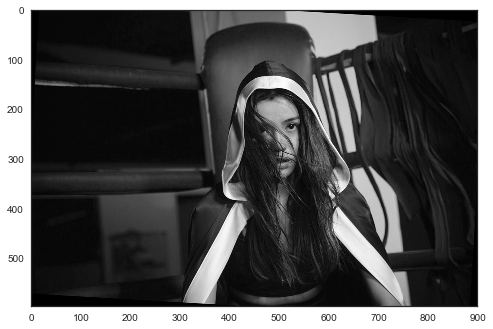

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


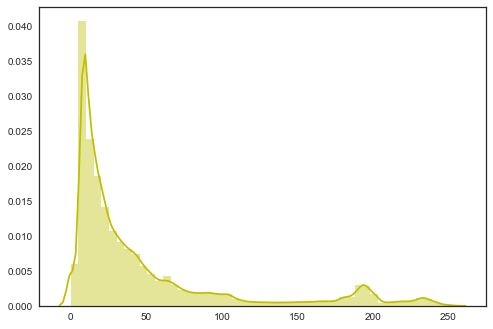

In [1]:
%matplotlib inline
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from scipy.linalg import solve
import seaborn as sns
sns.set_style("white")
im = Image.open('fa.jpeg')
im = np.asarray(im.convert('L'))
plt.imshow(im)
plt.gray()
plt.show()
ax = sns.distplot(im.flatten(), color="y")

In [54]:
laplace_filter = np.array([[1,1,1],[1,-8,1],[1,1,1]])
laplace_filter
filter_size = (3,3)
half_filter = np.int((filter_size[0]-1)/2)
c = -1

(3, 3)


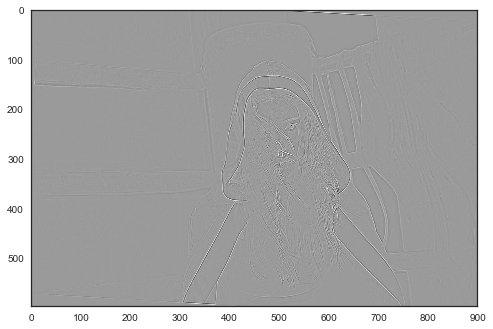

In [55]:
#先幫原圖加上padding
def padwithzeros(vector, pad_width, iaxis, kwargs):
    vector[:pad_width[0]] = 0
    vector[-pad_width[1]:] = 0
    return vector
padding_f = np.lib.pad(im,half_filter,padwithzeros)
new_pic = np.zeros(im.shape)
it = np.nditer(new_pic,flags = ['multi_index'],op_flags = ['readwrite'])
# neighbor_area = np.zeros(filter_size)
while not it.finished:
    neighbor_area = padding_f[it.multi_index[0]:(it.multi_index[0]+filter_size[0]),it.multi_index[1]:it.multi_index[1]+filter_size[0]]
    it[0] = np.sum(np.multiply(neighbor_area,laplace_filter))
#     print(neighbor_area.shape)
    it.iternext()
print(neighbor_area.shape)
plt.imshow(new_pic)
plt.show()

[[ 19.  19.  27. ...,  32.  29.  41.]
 [ 20.  20.  27. ...,  41.  36.  49.]
 [ 20.  19.  26. ...,  32.  36.  49.]
 ..., 
 [  0.  14.  22. ...,  10.  14.   0.]
 [  0.   8.  15. ...,  14.  16.   0.]
 [  0.   6.  14. ...,   5.  16.   0.]]


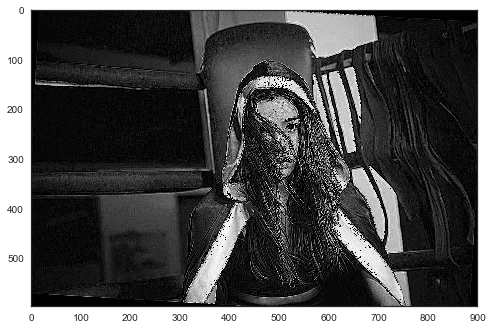

In [67]:
# 要注意不可以變成負值，最後還要轉成int才會顯示完美
mix_pic = np.zeros(im.shape)
mix_pic = im + c*new_pic
mix_pic[mix_pic<0] = 0
print(mix_pic[100:200,100:200])

plt.imshow(mix_pic.astype(np.uint8))
plt.show()

## 鈍化遮罩